In [1]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/SOC 128D"

#Packages for working with data
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
import numpy as np

mplt.style.use("ggplot")

Mounted at /content/drive


1. Using the guardian_katrina.csv dataset (from Canvas Files), create a graph that compares word frequencies for different types of news stories (for example, World news vs. U.S. news). Motivate your comparison with some intuition or evidence, and tell us why this comparison is interesting. If you have more than two categories, try using the facet_wrap() command to display all the different graphs (an example of this can be found in the Text Mining with R book).Explain what you see in your visualization(s) and results.

In [2]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_df = pd.DataFrame({'word': stopwords.words('english')})
df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/guardian_katrina.csv")

# unnest_tokens() + Anti-Join stopwords
df = df.assign(word=df["body_text"].str.lower().str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
merged_df = pd.merge(df, stopwords_df, left_on=['word'], right_on=['word'], how="left", indicator=True)
left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']

section_names_df = df[df['word'].isin(left_from_merged_df)].loc[:,["section_name", "word"]]
commentable_df = df[df['word'].isin(left_from_merged_df)].loc[:,["commentable", "word"]]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


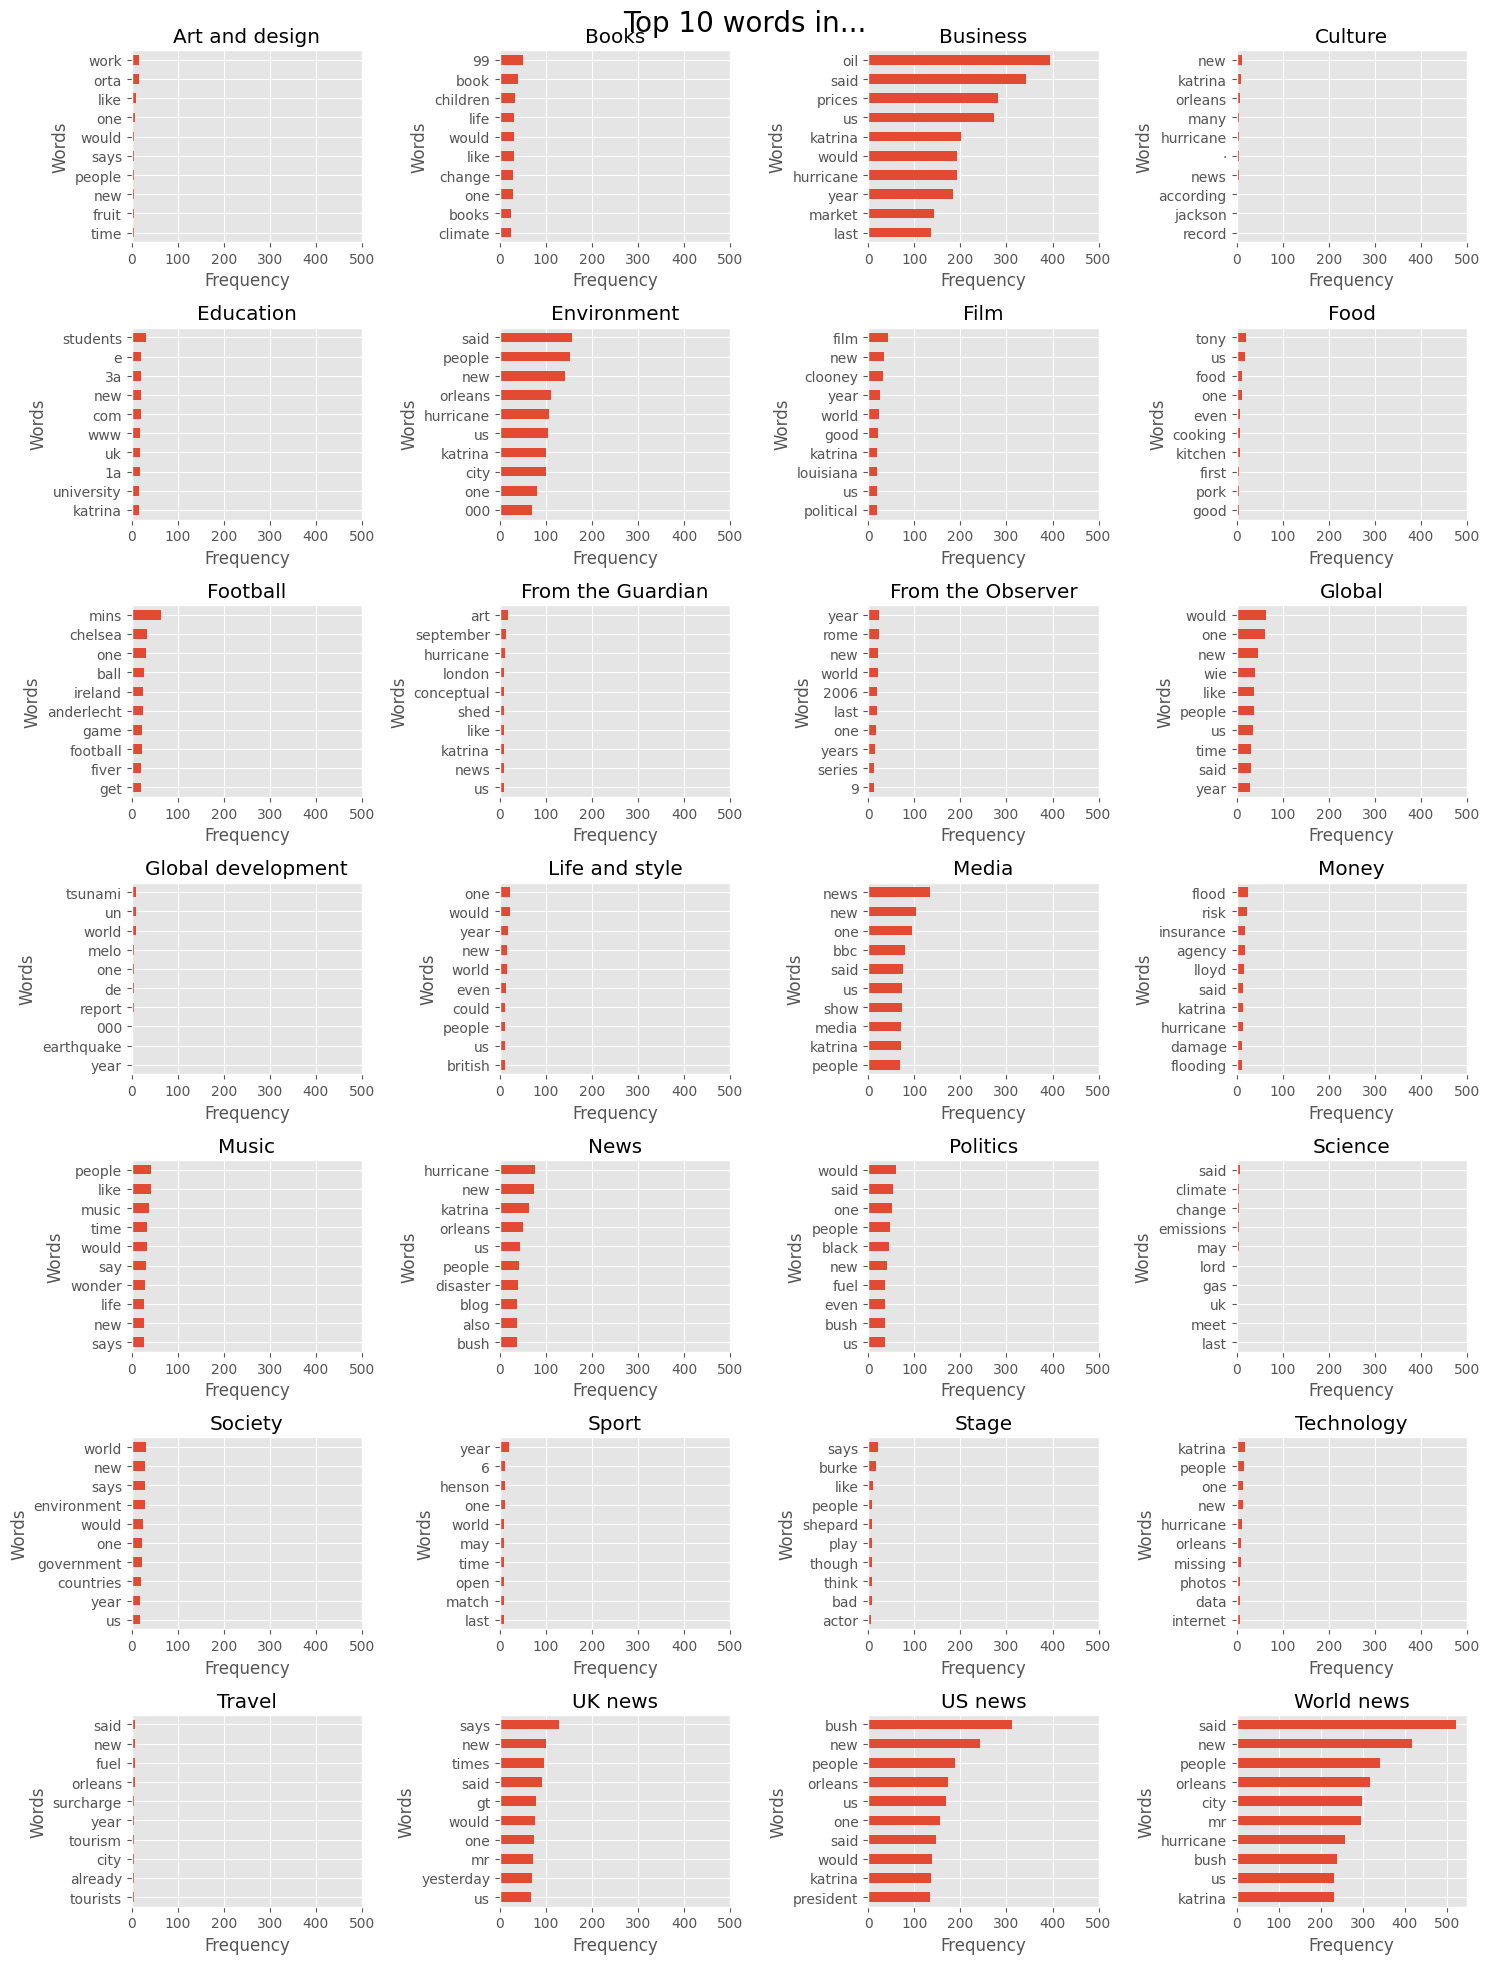

In [16]:
grouped_section = section_names_df.groupby('section_name')
top_10_words_per_section = {}

for section_name, group in grouped_section:
    word_counts = group['word'].value_counts().head(10)
    word_counts = word_counts.iloc[::-1]
    top_10_words_per_section[section_name] = word_counts

fig, axes = mplt.subplots(7, 4, figsize=(15, 20))
axes = axes.flatten()

for i, (section_name, word_counts) in enumerate(top_10_words_per_section.items()):
    ax = axes[i]
    word_counts.plot(kind='barh', ax=ax)
    ax.set_title(section_name)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_xticks(ticks=np.arange(0, 551, step=100))

mplt.suptitle("Top 10 words in...", fontsize=20)
mplt.tight_layout()
mplt.show()

I wanted to compare the section name of the articles, as sources typically chase after events that can generate greater viewership, especially times like this period of Hurricane Katrina. I expected the Environment, US news and World sections to dominate the news space and "katrina" to come up as one of the ten most frequently used words in the articles of their respective section.

The visualization proves part of my expectation to be true, as Environment, US news and World sections generated a lot more content, as seen from the number of words used. Within US news and World news sections, "Bush" and "President" were mentioned quite frequently, suggesting politics at play. "Orleans" or "New" (as part of "New Orleans") came up quite frequently also, since this was the place of the disaster.

However, Business too gained a lot of attention, which makes sense as the hurricane destroyed livelihoods and heavily impacted businesses. More specifically, people were talking about "oil", "prices" and "market", and probably comparing them to the "last year" since a hurricane of that unprecedented magnitude would really have caused stock prices to plummet.

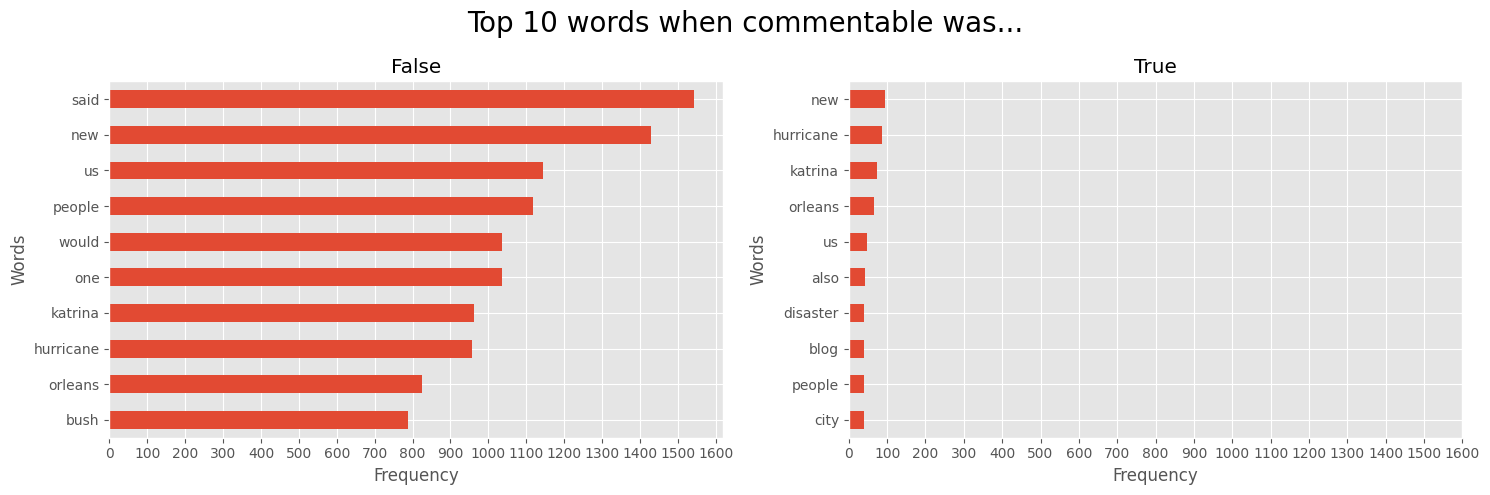

In [4]:
grouped_commentable = commentable_df.groupby('commentable')
top_10_words_per_commentable = {}

for commentable, group in grouped_commentable:
    word_counts = group['word'].value_counts().head(10)
    word_counts = word_counts.iloc[::-1]
    top_10_words_per_commentable[commentable] = word_counts

fig, axes = mplt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()

for i, (commentable, word_counts) in enumerate(top_10_words_per_commentable.items()):
    ax = axes[i]
    word_counts.plot(kind='barh', ax=ax)
    ax.set_title(commentable)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_xticks(ticks=np.arange(0, 1700, step=100))

mplt.suptitle("Top 10 words when commentable was...", fontsize=20)
mplt.tight_layout()
mplt.show()

In search of another header to compare, I thought the "commentable" header could be quite interesting, as it allows a place for online discussion on the article written.

The visualization depicts a stark contrast in the type of article written, based on the frequency of words used in the articles, when comments were disabled vs enabled. When comments were disabled, articles seemed to be politics-heavy, as suggested by "bush" being mentioned nearly 800 times, whereas on the other side, articles were shorter and fewer and "bush" did not appear even in the top 10 most frequent words. However, this period generally indeed was heavily-concentrated on the hurricane event, as both graphs have an overlap in the most frequently used words in articles during this time - "new", "us", "katrina", "hurricane", "orleans".

2. Create an account on ProQuest DTM, and create a dataset for news related to Hurricane Katrina. Explain what news sources you included and why. Use the visualization option to produce the three types of visuals, and say a little bit about what each might mean (or whether there is any significance to these).



I opted for the dates from 1 January 2005, to 31 December 2012 as this covers the almost the full extent of Hurricane Katrina. As in the class materials, although Hurricane Katrina occurred in 2005, it was not until 7 years later that "the discourse and lobbying would ultimately lead to changes enacted in the Biggert-Waters Flood Insurance Reform Act of 2012." Therefore it is important for the chosen articles to reflect this period as much as possible within the limit of 10000 articles.

I included The Washington Post newspapers, as it has the most number of articles and therefore information of Hurricane Katrina to form a more complete picture  of the event. For the document types, I opted for the articles and general information to create the general big picture of Hurricane Katrina. I included commentaries also to capture people's opinions and sentiments during this period.

Geographic Visualization:
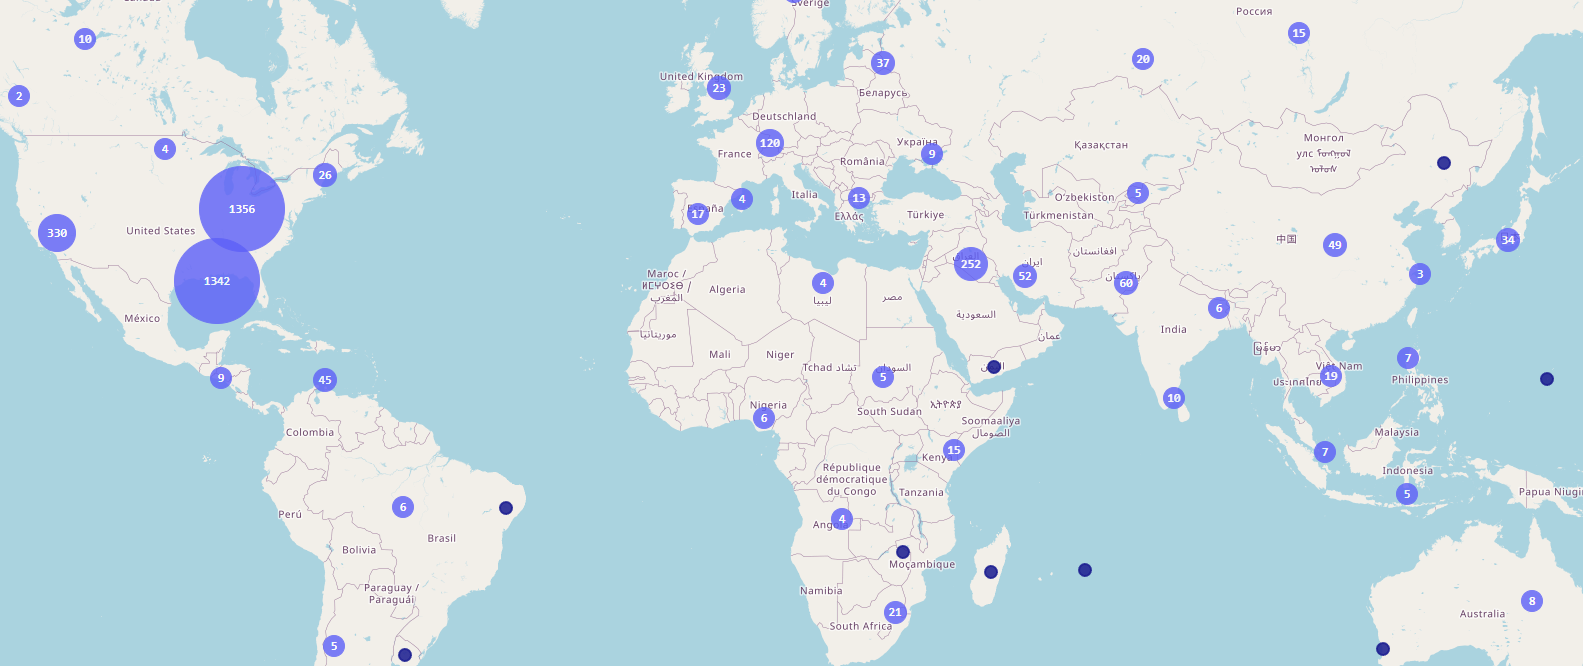
Not surprisingly, states in the U.S which had major news outlets like "The Washington Post", "Los Angeles Times", "New York Times" took majority of the share in the returned results, discussing Hurricane Katrina's impacts on New Orleans and comparing her to similar hurricanes throughout the years. They are represented by large circles.

Interestingly however, the largest circle outside of the U.S was in Iraq. Upon perusing of the articles, it seemed the Iraq war coincided with the aftermath of Hurricane Katrina and some articles were debating the paradox of the neo-conservative doctrine, that ironically "it was bad for government to help Americans in need, especially those with dark skin, but it is virtuous for our tax dollars to be spent on foreigners in the name of democracy"

Topic Modelling Visualization:
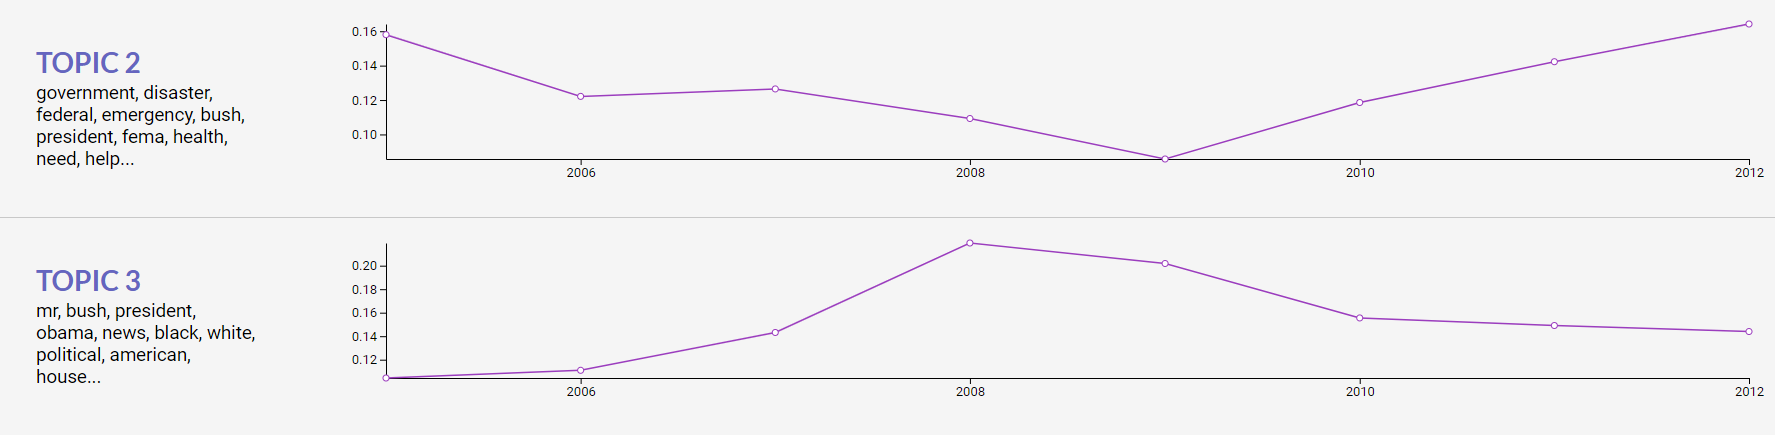
Topic 2 highlighted "government, disaster, federal, emergency, fema", which was came up the highest in 2005, but slowly declined to near-zero in 2009. This makes sense, as the issue had mostly blown over thus these words which were used to refer to the lack of help during Hurricane Katrina saw declining usage. From 2009 to 2012 however, it has been increasing steadily, almost a linear line, which suggests a major event involving these bodies.

Topic 3 highlighted the politics in 2008, probably around the presidential elections, which saw usage of words like "bush, president, obama, black, white, political, american, house".


Sentiment Visualization:
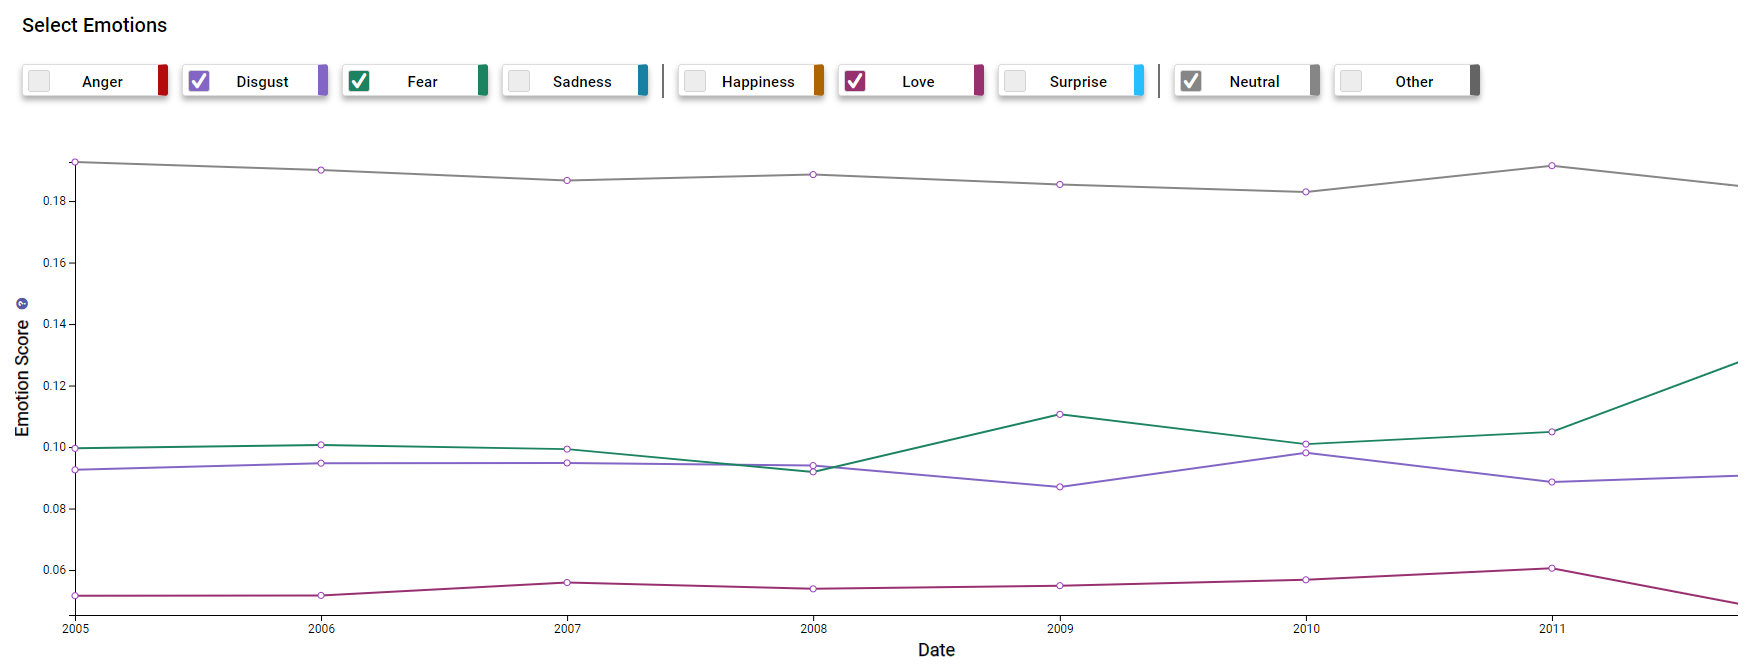
Articles were mostly neutral, with Anger, Love, Surprise, Happiness, Sadness being mostly constant. However only in 2009, Disgust decreased and Fear increased. Perhaps this could do with the uncertainty that follows presidential elections.

3. Now, try analyzing your data in the workbench. Create some simple frequencies of dates or news sources, and try to export these as a csv file. (Remember that you will not be able to export the full text). Then load the csv into your local R and create a graph using ggplot2. BONUS: If you are feeling ambitious, you can try installing the tidytext package in ProQuest TDM Studio, and exporting some word frequencies or other summary statistics. Just FYI, installing tidytext in ProQuest requires some additional effort. For instructions, see Getting Started -> 2022.05.25 -> ProQuest TDM Studio Manuals -> TDM_Studio_Manual.ipynb.



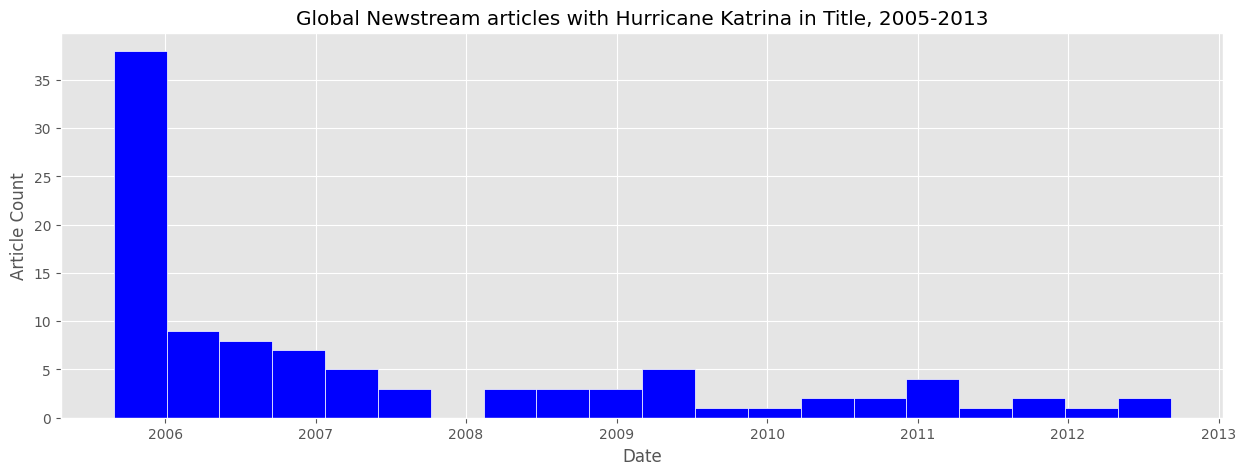

In [5]:
proquest_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/proquest_hurricane_katrina.csv")
proquest_df["Date"] = pd.to_datetime(proquest_df["Date"])
proquest_df["Date"].hist(bins=20, figsize=(15,5), color="blue", ec="white")
mplt.title("Global Newstream articles with Hurricane Katrina in Title, 2005-2013")
mplt.xlabel('Date')
mplt.ylabel('Article Count')
mplt.show()

4. Download at least two of the files from the “Katrina Hearings” folder in Canvas (within the Data folder), or choose your own congressional hearing [here](https://www.govinfo.gov/app/collection/chrg) and download PDFs. Convert the documents to tidytext style using the unnest_tokens() function, and remove stop words. Show the first few rows of each dataset using the head() function.



In [6]:
!pip install PyPDF2
from PyPDF2 import PdfReader

nextphase_text = []
reader = PdfReader(f"drive/My Drive/{FOLDERNAME}/data/katrina_hearing_nextphase.pdf")
for page_num in range(len(reader.pages)):
  # extracting text from page
  text = reader.pages[page_num].extract_text()
  nextphase_text.append(text)

nextphase_df = pd.DataFrame({"text": nextphase_text})

# unnest_tokens() + Anti-Join stopwords
nextphase_df_temp = nextphase_df.assign(word=nextphase_df["text"].str.lower().str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
merged_df = pd.merge(nextphase_df_temp, stopwords_df, left_on=['word'], right_on=['word'], how="left", indicator=True)
left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']
nextphase_df_temp = nextphase_df_temp[nextphase_df_temp['word'].isin(left_from_merged_df)].loc[:,["word"]]

nextphase_word_counts = nextphase_df_temp["word"].value_counts()
nextphase_word_counts.head(20)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.3 MB/s eta 0:00:00


people     231
c          166
may        160
senator    150
would      135
think      130
13         127
23         127
po         126
pat        126
2002       126
31         126
024244     125
jkt        125
00000      125
frm        125
fmt        125
2006       125
sfmt       125
verdate    125
Name: word, dtype: int64

In [7]:
fraud_text = []
reader = PdfReader(f"drive/My Drive/{FOLDERNAME}/data/katrina_hearing_fraud_2.pdf")
for page_num in range(len(reader.pages)):
  # extracting text from page
  text = reader.pages[page_num].extract_text()
  fraud_text.append(text)

fraud_df = pd.DataFrame({"text": fraud_text})

# unnest_tokens() + Anti-Join stopwords
fraud_df_temp = fraud_df.assign(word=fraud_df["text"].str.lower().str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
merged_df = pd.merge(fraud_df_temp, stopwords_df, left_on=['word'], right_on=['word'], how="left", indicator=True)
left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']
fraud_df_temp = fraud_df_temp[fraud_df_temp['word'].isin(left_from_merged_df)].loc[:,["word"]]

fraud_word_counts = fraud_df_temp["word"].value_counts()
fraud_word_counts.head(20)

6601       284
c          205
13         174
30         172
027030     169
txt        169
sfmt       169
fmt        169
frm        169
00000      169
po         169
jkt        169
psn        169
2007       169
mar        169
08         169
2002       169
09         169
0ct        169
verdate    169
Name: word, dtype: int64

5. Compare the frequencies of words between the two hearings. First, use the count() function to generate counts of words in each document, and compare the two using tables or a plot. Then, read portions of each document in more detail to explain some of the trends that you see. Are you able to say something meaningful about the congressional discourse? Why or why not?

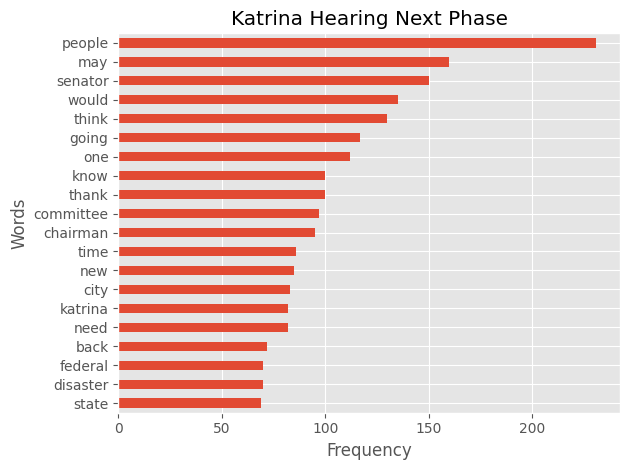

In [8]:
extra_stopwords_df = pd.DataFrame(pd.concat([stopwords_df["word"], pd.Series(nextphase_word_counts[nextphase_word_counts.between(125,127)].keys()), pd.Series(["6601", "c", "6633", "said", "get"])], axis=0, ignore_index=True)).rename({0: "word"}, axis=1)

# unnest_tokens() + Anti-Join extra stopwords (document markers)
nextphase_df_temp = nextphase_df.assign(word=nextphase_df["text"].str.lower().str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
merged_df = pd.merge(nextphase_df_temp, extra_stopwords_df, left_on=['word'], right_on=['word'], how="left", indicator=True)
left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']
nextphase_df_temp = nextphase_df_temp[nextphase_df_temp['word'].isin(left_from_merged_df)].loc[:,["word"]]

nextphase_word_counts = nextphase_df_temp["word"].value_counts().head(20).iloc[::-1]
nextphase_word_counts.plot(kind='barh')
mplt.title("Katrina Hearing Next Phase")
mplt.xlabel('Frequency')
mplt.ylabel('Words')
mplt.tight_layout()
mplt.show()

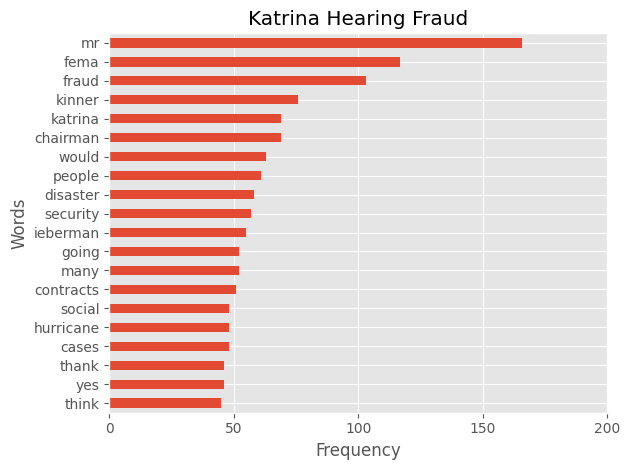

In [9]:
extra_stopwords_df = pd.DataFrame(pd.concat([stopwords_df["word"], pd.Series(fraud_word_counts[fraud_word_counts >= 169].keys()), pd.Series(["27030", "l"])], axis=0, ignore_index=True)).rename({0: "word"}, axis=1)

# unnest_tokens() + Anti-Join extra stopwords (document markers)
fraud_df_temp = fraud_df.assign(word=fraud_df["text"].str.lower().str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
merged_df = pd.merge(fraud_df_temp, extra_stopwords_df, left_on=['word'], right_on=['word'], how="left", indicator=True)
left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']
fraud_df_temp = fraud_df_temp[fraud_df_temp['word'].isin(left_from_merged_df)].loc[:,["word"]]

fraud_word_counts = fraud_df_temp["word"].value_counts().head(20).iloc[::-1]
fraud_word_counts.plot(kind='barh')
mplt.title("Katrina Hearing Fraud")
mplt.xlabel('Frequency')
mplt.ylabel('Words')
mplt.xticks(ticks=np.arange(0, 201, step=50))
mplt.tight_layout()
mplt.show()

I chose the "Next Phase" part of the Katrina congressional hearings, as I was curious if text-mining the document would give me a notion of their intended course in the future.

However, I was not really able to find those. Instead, it seemed the congressional hearing on the next phase after Hurricane Katrina involved alot regarding the "people", perhaps suggesting an optimistic resolution to help. Additionally, "may" and "thank" are used as part of formalities in the hearing, which does not provide much value.

Upon reading the document, it is indeed that the congress members felt the government failed in helping the people, as well-put by Senator Carper: "I think it was Abraham Lincoln who once said the role of government
is to do for the people what the people cannot reasonably do
for themselves. Four years after September 11th, however, it is
clear to me that we still do not have our act together when it comes
to responding to national emergencies." and resolve to do so. Meanwhile, a lot of the statistics of people being evacuated, relocated or deaths were described, which contributes to the high frequency.

I chose the "Fraud" part of the Katrina congressional hearings, as it sounded interesting. In what ways did fraud become so significant surrounding the disaster that it mandated a hearing?

"mr" and "thank" are used as part of formalities in the hearing, which again does not provide much value. More interestingly, "kinner" and "ieberman" were mentioned quite frequently, suggesting they are people quite central to this issue. It seems the fraud was regarding certain "social contracts"?

Upon delving further into the document, it seemed that people took advantage of the relief programs. Mr Skinner was the Inspector General of the U.S. DEPARTMENT OF HOMELAND SECURITY, questioning why FEMA "purchased nearly 25,000 manufactured homes at a cost of \$857 million and around 1,300 modular homes at a cost of \$40 million" yet "by FEMA’s own regulations, could not be installed in most of the affected area". This suggests misuse of the funds. Lieberman was a Senator who was questioning the finer details of how the perpetrators carried out the fraud. It seemed that the management or preparation of the assistance program was really the one at fault, as it allowed for such widespread misuse of funds with loopholes and weak security.

I think in general, 20-30 highest frequency words might still not be sufficient to understand the discourse, as some words are vague and do not connote or insinuate anything interesting. TF-IDF would solve this issue for the most part.

In [10]:
# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "PS3_AndrewYu.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2

!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME

/content/drive/My Drive
/content/drive/My Drive/Stanford Summer Session/SOC 128D
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfon